In [1]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [2]:
path_to_mallet = '/Volumes/Passport-1/packages/mallet-2.0.8/bin/mallet'  # CHANGE THIS TO YOUR MALLET PATH

<br><br>

# Load poetry dataset

Data is available here:  
https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [3]:
poetry_path = '/Volumes/Passport-1/data/kaggle-poem-dataset/kaggle_poem_dataset.csv'  # CHANGE THIS TO YOUR DATASET PATH

In [4]:
poetry_df = pd.read_csv(poetry_path)
poetry_df.sample(5)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
9921,9921,Rachel Wetzsteon,The Other Stars,54139,I.\n\nTripartite schemes were all very well\nf...
2613,2613,Sarah Orne Jewett,A Country Boy in Winter,47688,"The wind may blow the snow about,\nFor all I c..."
6931,6931,Lucy Tunstall,Kaftan,118568,My mother has taken me to Paddington Station.\...
14575,14575,Robert Herrick,The Vine,50721,I dreamed this mortal part of mine\nWas metamo...
3976,3976,Marie Sheppard Williams,Everybody,53115,"I stood at a bus corner\none afternoon, waitin..."


In [5]:
print(len(poetry_df.index))

15652


In [6]:
training_data = [lmw.process_string(t) for t in poetry_df['Content'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

15644

In [7]:
training_data[10]

'heart let pity let live sad self hereafter kind charitable live tormented mind tormented mind tormenting yet cast comfort get groping round comfortless blind eyes dark day thirst find thirst world wet soul self come poor jackself advise jaded let call thoughts awhile elsewhere leave comfort root room let joy size god knows god knows whose smile wrung see unforeseen times rather skies betweenpie mountains lights lovely mile'

In [8]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

In [9]:
lmw.print_dataset_stats(training_data)

Number of Documents: 15644
Mean Number of Words per Document: 136.9
Vocabulary Size: 103060


<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

If you're training in a Jupyter notebook, you can observe progress by checking the terminal window from which you started Jupyter. The MALLET output will also be printed at the end of training.

Note that training creates a copy of your dataset, so it might require significant space.

## Training Option A: Get started quickly!

Use this function if you want to quickly load the topic keys and distributions, without fine control over the training parameters and output paths.

In [10]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/maria/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

In [11]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


In [12]:
assert(len(topic_distributions) == len(training_data))

In [13]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 water sea river wind like ocean sand waves rock land
1 	 said would could one came saw went knew thought back
2 	 like red blood white dog eat little sweet black milk
3 	 one even would time life could self body without mind
4 	 thy thou love thee shall yet may fair heart see
5 	 black little like got mother says man white girl let
6 	 city men street like streets children people women town road
7 	 know one like say would think see love want way
8 	 NUM poem new poetry people america poems american writing poet
9 	 king men war lord man one old blood land god
10 	 like night upon day heart sweet round long still song
11 	 one time room day two back years like house night
12 	 words word name song one language music sound voice like
13 	 like eyes body face hand hands back hair head mouth
14 	 NUM þat hym hit ful watz alle hem þay bot
15 	 god death life love world dead man earth soul heart
16 	 god thus heav thir earth first though high man yet
17 	 like light white sky blue sun t

In [14]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.631 small panting mass moonlight dampness log glistening tumor terrible frog moonlight dampness log small panting mass

0.5969 herds buffalo gone search undulating sea grass near campo wildhorse great hairy horned whales none surface instead look carefully see shallow swimming hahe issi pronghorn antelope identify striped sailfish skimming surface harpoon throw away hungry nesters diving cereal great plains plankton seed visible fast

0.59 cannery porpoise soul shadow fins spirit boats lie awake hundred hooks flying reels one harpoon silver fleshing nets mayor waiting/counting scales dreaming new quotas tuna coasts table blood payrolls swim shores crucifix oil cannery porpoise soul steals dagger engines throat tuna fins etch green stone ships floor documents worker sweat files rolled sleeve salt spear sails anchor years lost inside shoulders ropes somehow policy gunned waves back porpoise sea born



## Training Option B: Train using import and training functions

Use these functions to have more control over the training parameters and output paths.

In [22]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/maria/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)

In [24]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [25]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


In [26]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 said could would one came saw went knew took thought
1 	 NUM þat hym hit ful watz alle hem þay bot
2 	 one body world time even like mind life without self
3 	 men blood war dead children people death land city women
4 	 black got like song let back dance get boy music
5 	 street like new city car old back home house night
6 	 one old man little well good let see come way
7 	 þæt ond wæs swa þær mid que æfter hie ofer
8 	 like eat white pink red table little milk paper kitchen
9 	 like eyes body hands face back head hand hair mouth
10 	 water sea like river sky wind sand ocean waves sun
11 	 light one see room back still glass across air blue
12 	 yet like still must though mind may nature whose life
13 	 god king thir thus heav earth lord man high men
14 	 NUM poem book read poetry one poems years words two
15 	 like one know say think want would time way see
16 	 thy thou love thee shall yet may fair heart sweet
17 	 night like upon light heart day dark far air deep
18 	 love god

In [27]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15644, 20)

In [28]:
assert(len(topic_distributions) == len(training_data))

In [29]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.7552 little brother brought mother said want another little brother change said bother took father said little bother brother strange said one little brother exactly like another every little brother misbehaves bit said took little bother mother father put little bother brother back bed

0.642 last night heard voice mother words sang little barefoot boy knelt knee tears gushed heart mother passed beyond wall though fountain reached throat drops refused fall tis ten years since died mother ten dark years pain wish could weep

0.6071 aunt died uncle raised hands like prophet bible lost girl said lost girl shaking head didn know say look quiet uncle raising voice silence aunt eighty seven listen uncle said sighing like tree alone night women know every midnight new year eve others sang laughed hugged aunt looked tears eyes sixty years knew one day kiss good bye



<br><br>

# Plot topics by category

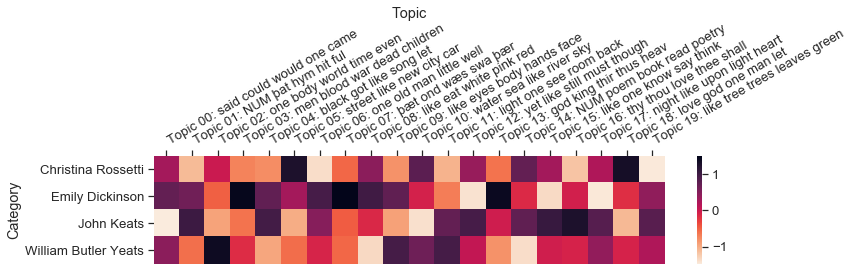

In [31]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(12,4))

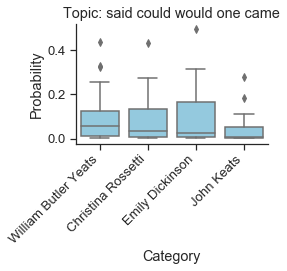

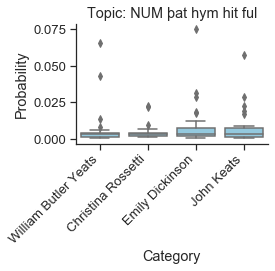

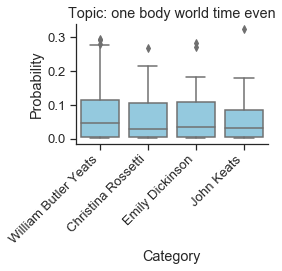

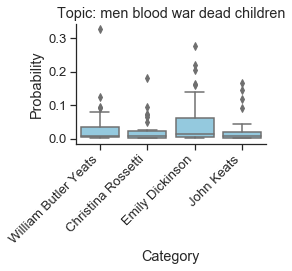

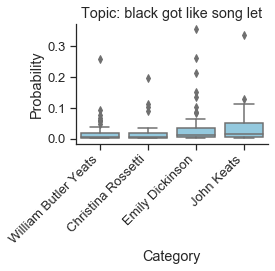

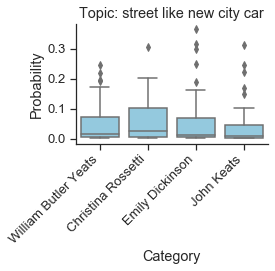

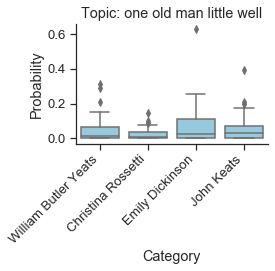

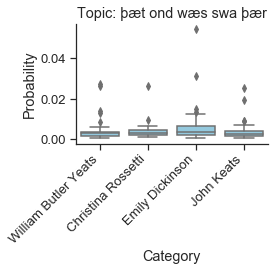

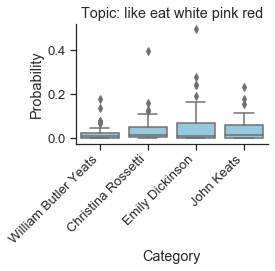

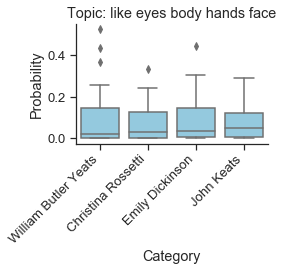

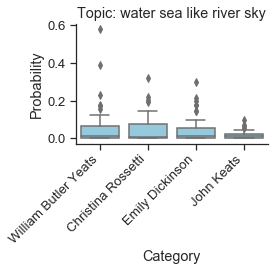

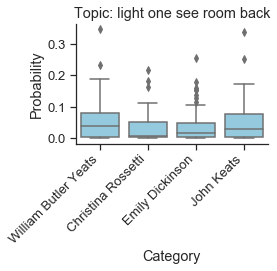

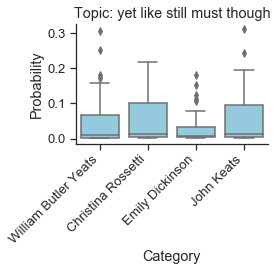

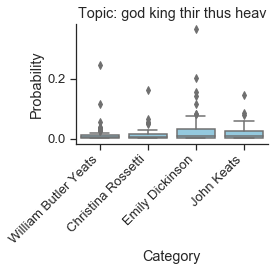

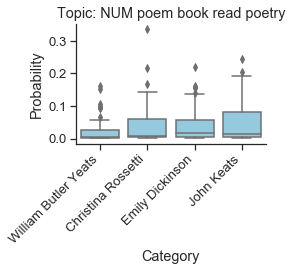

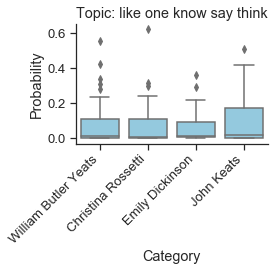

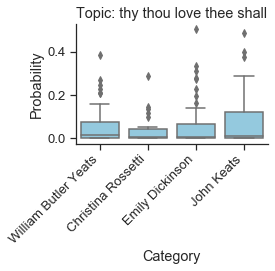

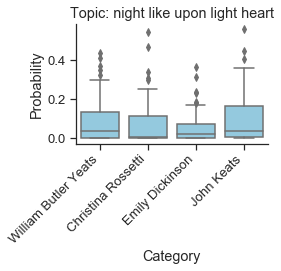

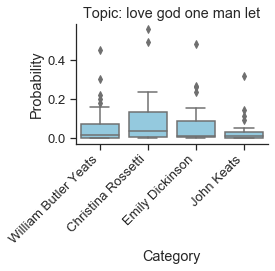

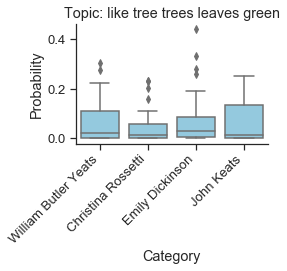

In [32]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over document time

Splits each training document into N chunks, infers the topics for those chunks (using the pre-trained topic model), and plots mean topic probabilities over document time.

In the example shown, it looks like poems often start with physical descriptions and end with abstract and romantic language.

In [33]:
divided_documents, document_ids, times = lmw.divide_training_data(training_data,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156440, 156440, 156440)

In [34]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [36]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                use_pipe_from=path_to_formatted_training_data)

Importing data using pipe...
Complete


In [37]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [38]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(156440, 20)

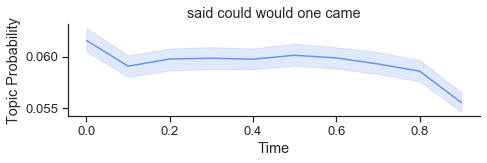

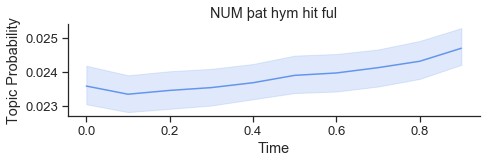

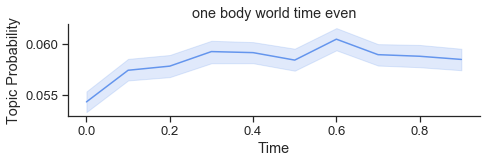

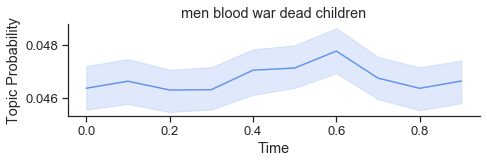

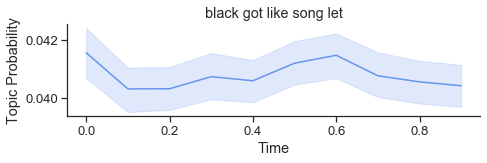

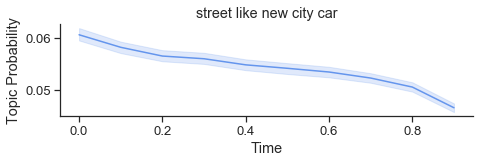

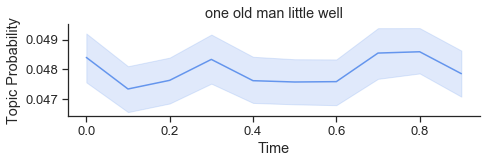

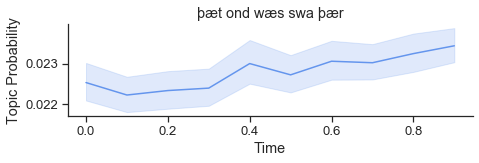

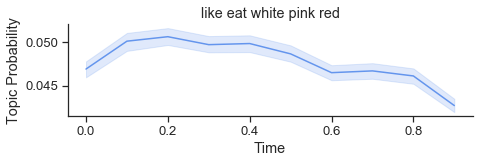

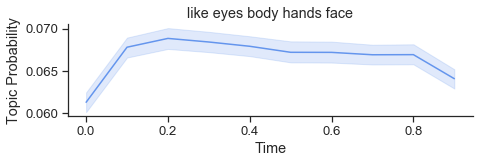

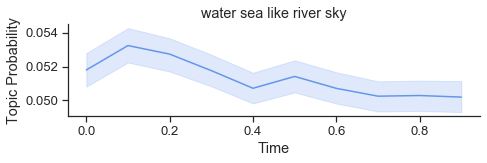

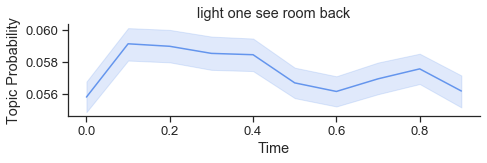

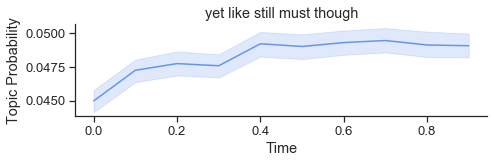

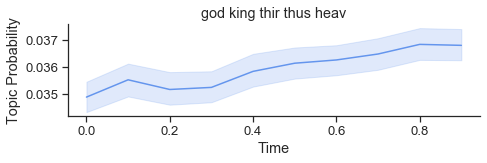

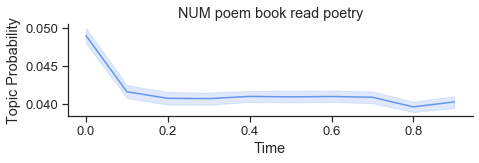

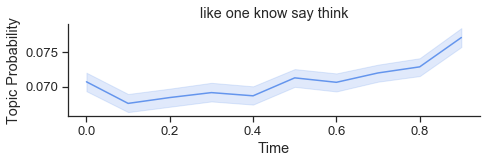

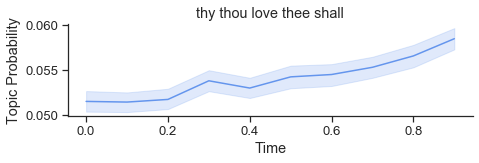

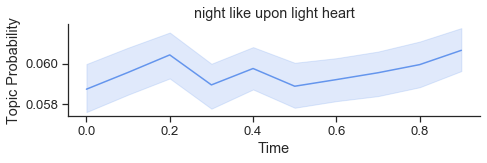

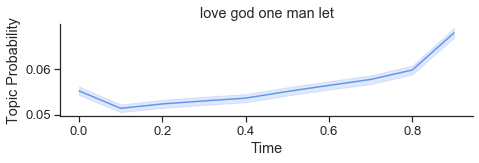

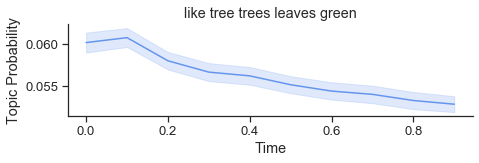

In [39]:
for _topic_index in range(0, len(topic_keys)):
    lmw.plot_topics_over_time(topic_distributions, topic_keys, times, _topic_index)